In [11]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table
from tqdm import tqdm

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('figure', dpi=120)
plt.rc('savefig', bbox='tight')

cols = ['RA', 'DEC', 'photo_z', 'MASS_BEST']
tbl = Table.read('data/desidr9_galaxy_cspcat.fits', memmap=True)
cut_tbl = Table.read('data/desidr9_galaxy_cspcat_cut.fits', memmap=True)

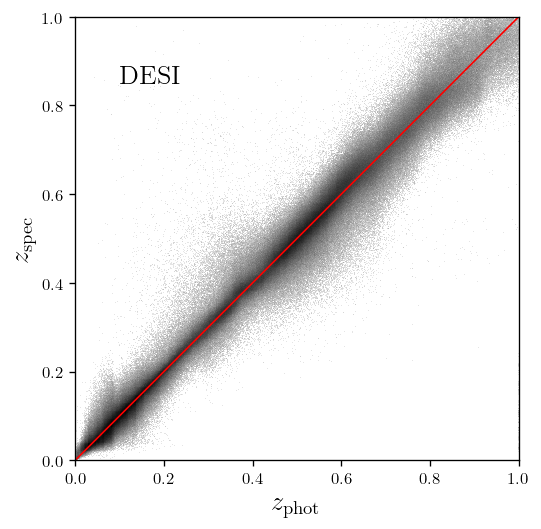

In [23]:
x = np.linspace(0, 1., 500)
plt.hist2d(cut_tbl['spec_z'], cut_tbl['photo_z'], bins=(x, x), 
           cmap='gray_r', norm='log')
plt.plot(x, x, 'r', lw=1)
plt.gca().set_aspect('equal')
plt.text(0.1, 0.85, 'DESI', fontsize=16)
plt.xlabel(r'$z_{\rm phot}$', fontsize=16)
plt.ylabel(r'$z_{\rm spec}$', fontsize=16)
plt.show()

100%|██████████| 2712682/2712682 [00:04<00:00, 665125.14it/s]


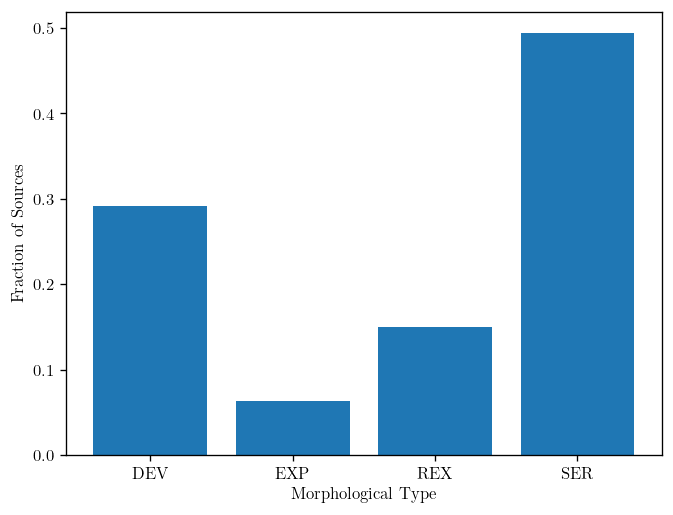

In [9]:
counter = {'DEV': 0, 'EXP': 0, 'REX': 0, 'SER': 0}
for typ in tqdm(cut_tbl['TYPE']):
    counter[typ] += 1
plt.bar(counter.keys(), [val / len(cut_tbl) for val in counter.values()])
plt.xlabel('Morphological Type')
plt.ylabel('Fraction of Sources')
plt.show()

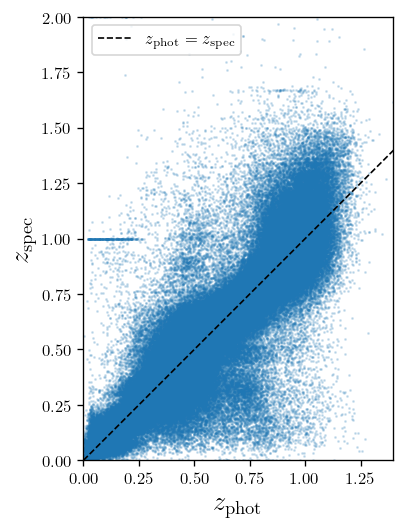

In [ ]:
plt.scatter(cut_tbl['photo_z'], cut_tbl['spec_z'], s=0.5, alpha=0.2)
_ = np.linspace(0, 1.5)
plt.plot(_, _, 'k--', lw=1, label=r'$z_{\rm phot}=z_{\rm spec}$')
plt.gca().set_aspect('equal')
plt.xlim(0, cut_tbl['photo_z'].max())
plt.ylim(0, 2)
plt.xlabel(r'$z_{\rm phot}$', fontsize=16)
plt.ylabel(r'$z_{\rm spec}$', fontsize=16)
plt.legend()
plt.show()

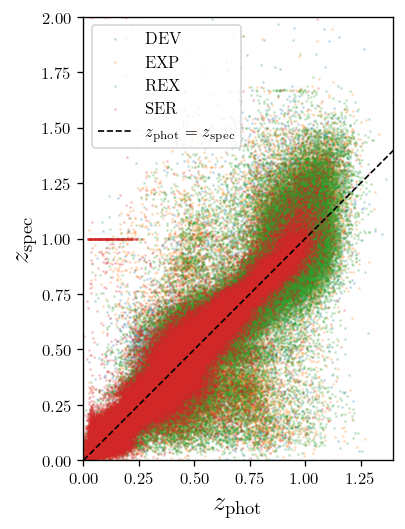

In [10]:
for typ in counter.keys():
    _tbl = cut_tbl[cut_tbl['TYPE'] == typ]
    plt.scatter(_tbl['photo_z'], _tbl['spec_z'], s=0.5, alpha=0.2, label=typ)
_ = np.linspace(0, 1.5)
plt.plot(_, _, 'k--', lw=1, label=r'$z_{\rm phot}=z_{\rm spec}$')
plt.gca().set_aspect('equal')
plt.xlim(0, cut_tbl['photo_z'].max())
plt.ylim(0, 2)
plt.xlabel(r'$z_{\rm phot}$', fontsize=16)
plt.ylabel(r'$z_{\rm spec}$', fontsize=16)
plt.legend()
plt.show()

In [19]:
cutmass_hist = np.histogram(cut_tbl['MASS_BEST'], density=True, bins=50)
rng = (cutmass_hist[1].min(), cutmass_hist[1].max())
mass_hist = np.histogram(tbl['MASS_BEST'], density=True, bins=50, range=rng)
morph_hists = {'DEV': None, 'EXP': None, 'REX': None, 'SER': None}
for typ in morph_hists.keys():
    mass = cut_tbl['MASS_BEST'][cut_tbl['TYPE'] == typ]
    morph_hists[typ] = np.histogram(mass, density=True, bins=50, range=rng)

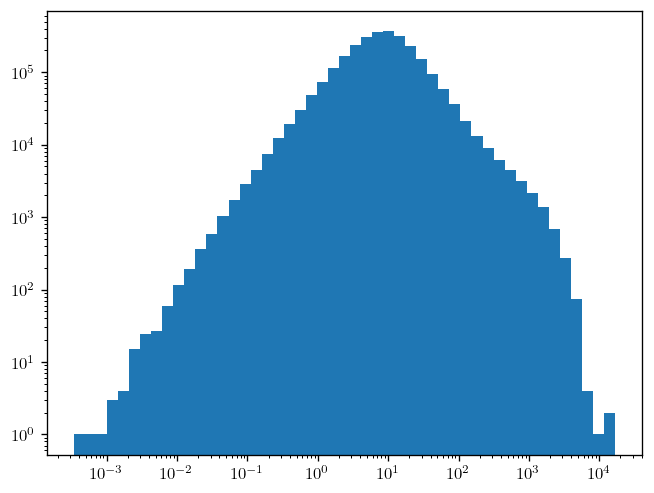

In [29]:
chi = cut_tbl['CHI_BEST']
plt.hist(chi, bins=np.logspace(np.log10(chi.min()), np.log10(chi.max()), 50))
plt.xscale('log')
plt.yscale('log')
plt.show()

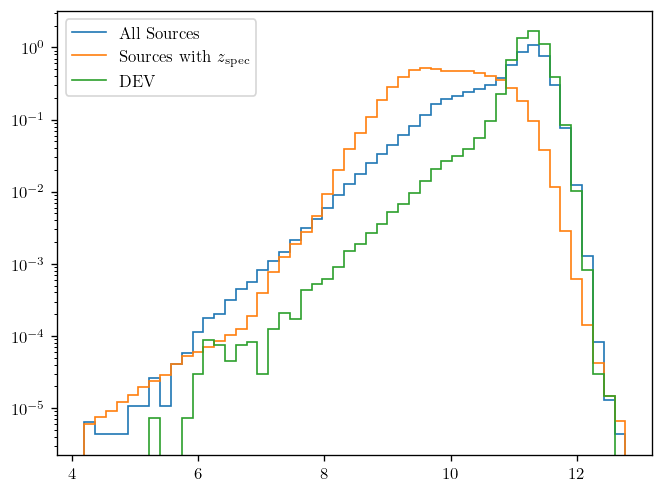

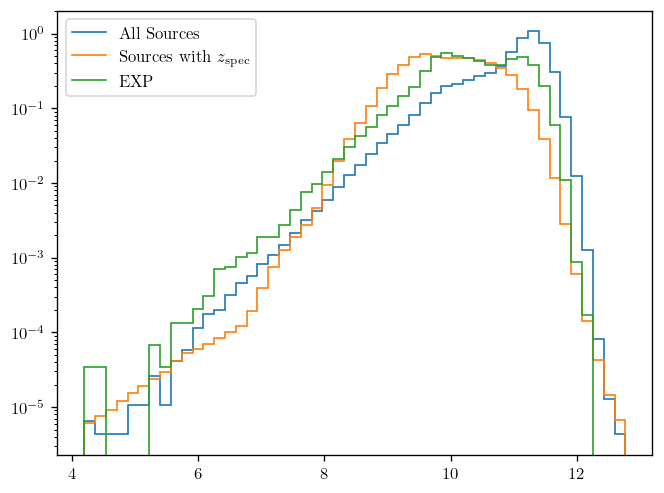

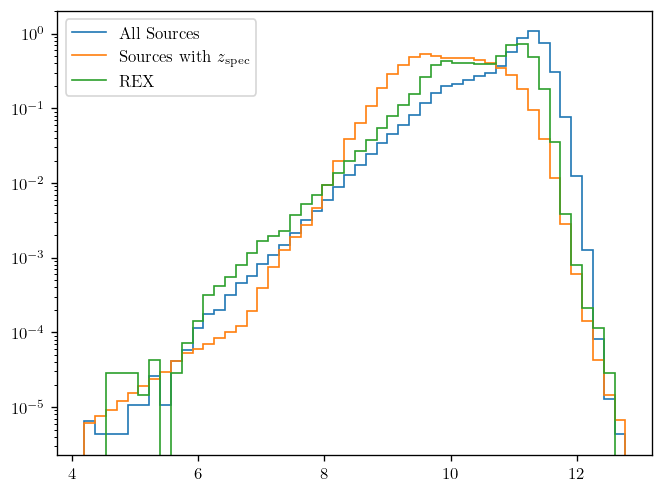

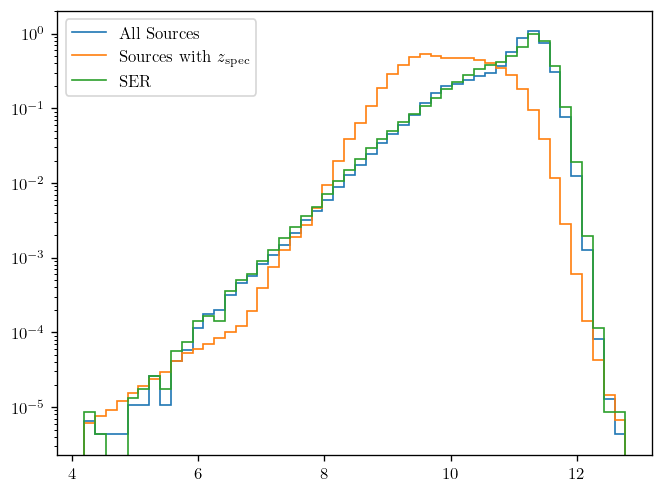

In [24]:
for typ in morph_hists:
    plt.stairs(*cutmass_hist, fill=False, label='All Sources')
    plt.stairs(*mass_hist, fill=False, label=r'Sources with $z_{\rm spec}$')
    hist = morph_hists[typ]
    plt.stairs(*hist, fill=False, label=typ)
    plt.yscale('log')
    plt.legend(loc=2)
    plt.show()